## Nama : Diyang Raditya Anwar
## NIM : 225150407111037
## Mata Kuliah : Analisis Penelitian Data Kuantitatif
## Program Studi : Sistem Informasi 

--- 

## Tugas 1 Analisis Data Penelitian Kuantitatif
- Lakukan analisis regresi linear sederhana dari dataset 
- Perhatikan syarat untuk regresi sederhana
- Lakukan uji validasi, relibilitas, dan asumsi klasik (linearitas, heterokedastisitas, normalitas, autokorelasi)

### Dataset yang dipakai
- Kaggle flood prediction dataset : https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset

### Deskripsi dataset : 
1. MonsoonIntensity: Meningkatnya curah hujan selama musim hujan meningkatkan kemungkinan terjadinya banjir.
2. TopographyDrainage: Kapasitas drainase berdasarkan topografi wilayah. Drainase yang efisien dapat membantu mengalirkan air hujan dan mengurangi risiko banjir.
3. RiverManagement: Kualitas dan efektivitas praktik pengelolaan sungai. Pengelolaan sungai yang tepat, termasuk pengerukan dan pemeliharaan tepi sungai, dapat meningkatkan aliran air dan mengurangi banjir.
4. Deforestation: Luasnya penggundulan hutan di wilayah tersebut.* Penggundulan hutan mengurangi kemampuan tanah untuk menyerap air, sehingga meningkatkan limpasan permukaan dan risiko banjir.
5. Urbanization: Tingkat urbanisasi di suatu wilayah. Wilayah perkotaan memiliki permukaan kedap air (aspal, beton), yang mengurangi infiltrasi air, sehingga meningkatkan risiko banjir.
6. ClimateChange: Dampak perubahan iklim terhadap kawasan ini. Perubahan iklim dapat menyebabkan pola curah hujan yang lebih ekstrem, termasuk hujan lebat yang dapat menyebabkan banjir.
7. DamsQuality: Kualitas dan status pemeliharaan bendungan. Bendungan yang terawat dengan baik dapat mengendalikan banjir, sedangkan bendungan yang bermasalah secara struktural dapat jebol dan menyebabkan banjir besar.
8. Siltation:  Tingkat sedimentasi di sungai dan waduk. Akumulasi sedimen di sungai (pendangkalan) mengurangi kapasitas drainase dan meningkatkan risiko banjir.
9. Agricultural Practices: Jenis dan keberlanjutan praktik pertanian. Intensifikasi pertanian dapat menyebabkan penggundulan hutan, penggunaan pupuk dan pestisida yang berlebihan, serta praktik irigasi yang tidak tepat, sehingga mengurangi keanekaragaman hayati tanah dan meningkatkan risiko banjir.
10. Encroachments: Tingkat gangguan pada dataran banjir dan jalur air alami. Pembangunan di daerah rawan banjir menghambat aliran air alami dan meningkatkan risiko banjir.
11. IneffectiveDisasterPreparedness: Kurangnya rencana darurat, sistem peringatan, dan simulasi meningkatkan dampak negatif banjir.
12. DrainageSystems: Sistem drainase yang terawat baik dan berukuran memadai membantu mengalirkan air hujan dan mengurangi risiko banjir.
13. CoastalVulnerability: Daerah pesisir dataran rendah rentan terhadap banjir akibat gelombang badai dan kenaikan permukaan air laut.
14. Landslides: Lereng yang curam dan tanah yang tidak stabil lebih rentan terhadap tanah longsor.
15. Watersheds: Wilayah dengan lebih banyak daerah aliran sungai mungkin memiliki risiko banjir lebih tinggi atau lebih rendah, tergantung pada berbagai faktor.
16. DeterioratingInfrastructure: Gorong-gorong yang tersumbat, saluran drainase yang rusak, dan infrastruktur yang kurang memadai lainnya dapat meningkatkan risiko banjir.
17. PopulationScore: Daerah yang padat penduduk dapat mengalami kerugian yang lebih parah.
18. WetlandLoss: Lahan basah berfungsi sebagai spons alami, menyerap kelebihan air dan membantu mencegah banjir.
19. InadequatePlanning: Perencanaan perkotaan yang tidak mempertimbangkan risiko banjir meningkatkan kerentanan masyarakat.
20. PoliticalFactors: Faktor-faktor seperti korupsi dan kurangnya kemauan politik untuk berinvestasi dalam infrastruktur drainase dapat mempersulit pengelolaan risiko banjir.
21. FloodProbability: Kemungkinan keseluruhan terjadinya banjir di wilayah tersebut. Ini adalah variabel target untuk analisis prediktif. (Variabel target)

## Syarat Regresi Sederhana
1) Jumlah sampel yang digunakan harus sama
2) Jumlah variabel bebas adalah satu
3) Nilai residual harus berdistribusi normal
4) Terdapat hubungan yang linear dengan variabel terikat
5) Tidak terjadi gejala heteroskedastisitas 
6) Tidak terjadi gejala autokorelasi 

Sumber : https://dqlab.id/gampang-banget-ini-teknik-analisis-data-regresi-dan-contohnya#:~:text=Model%20regresi%20linier%20sederhana%20harus,variabel%20terikat%2C%20tidak%20terjadi%20gejala

### Donwload library-library yang dibutuhkan dan dataset yang dimiliki

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, kstest
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Memuat data

In [2]:
data = pd.read_csv('../Datasets/task1/flood.csv')
data

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [3]:
data.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

dari detail per kolomnya sudah menjawab syarat no. 1 dan 2, jumlah variabel terikatnya hanya 1 yaitu FloodProbability dan jumlah sampel semua kolom memliki jumlah sama banyak yaitu 50000 sampel dan tidak ada missing values

### Mencari tahu informasi mengenai data dan distribusi datanya 

In [4]:
data.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

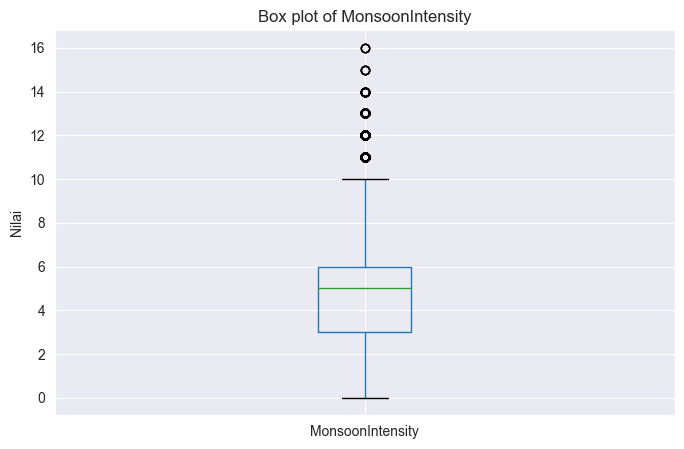

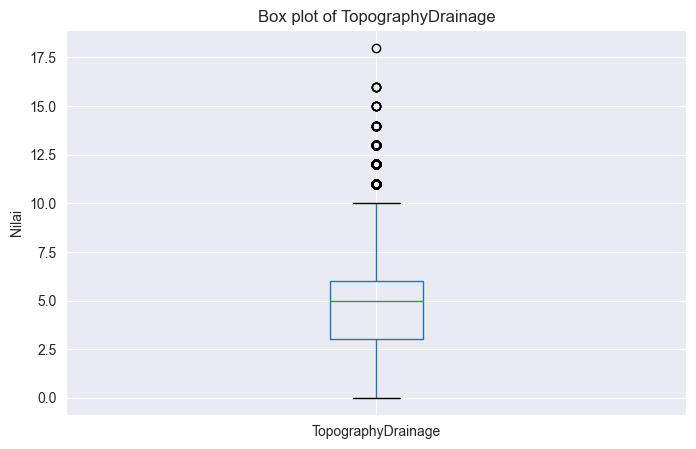

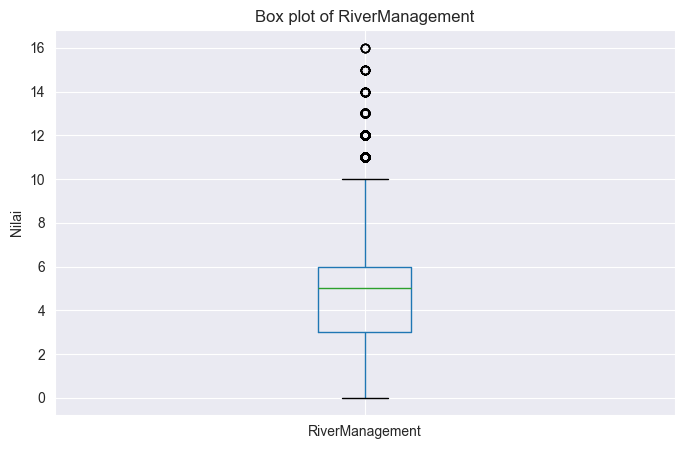

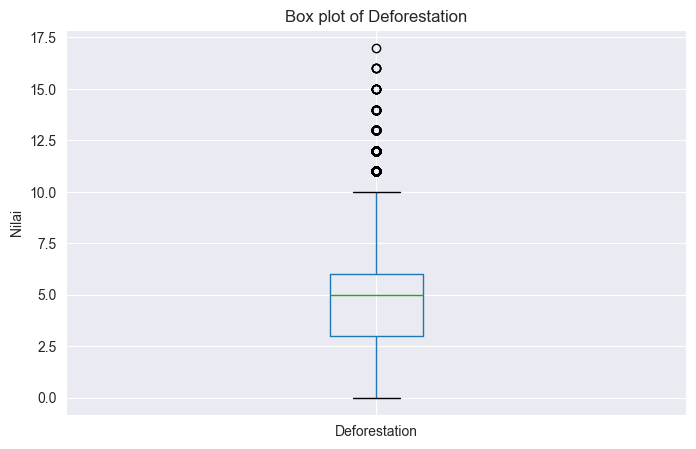

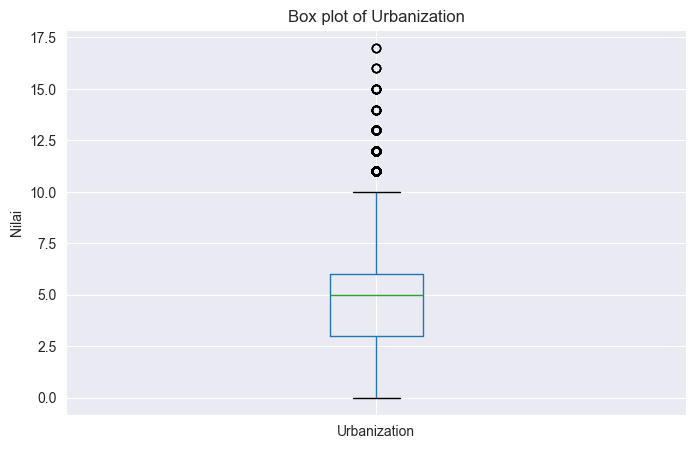

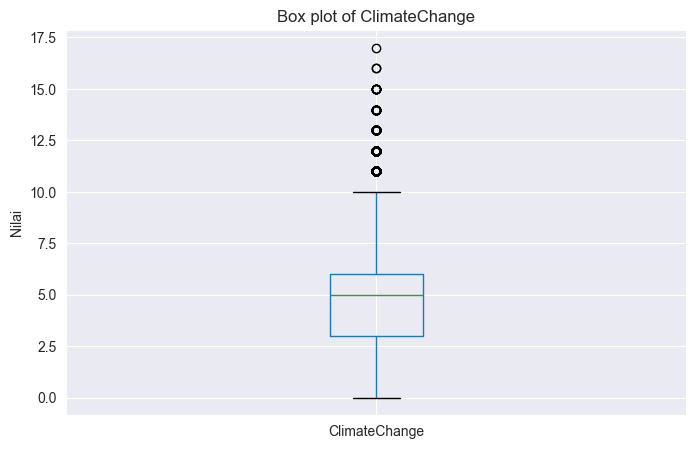

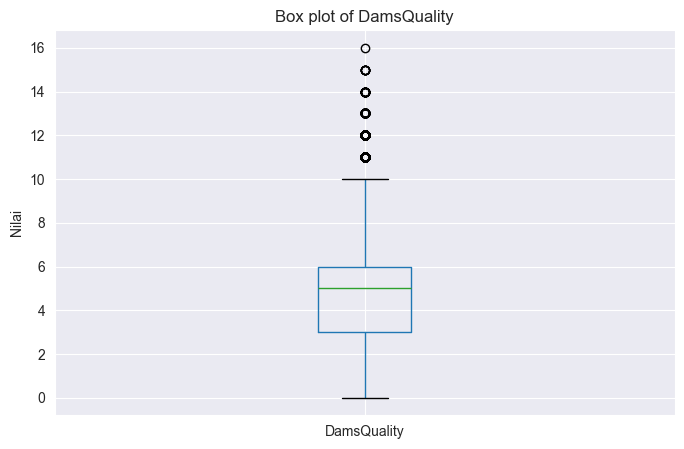

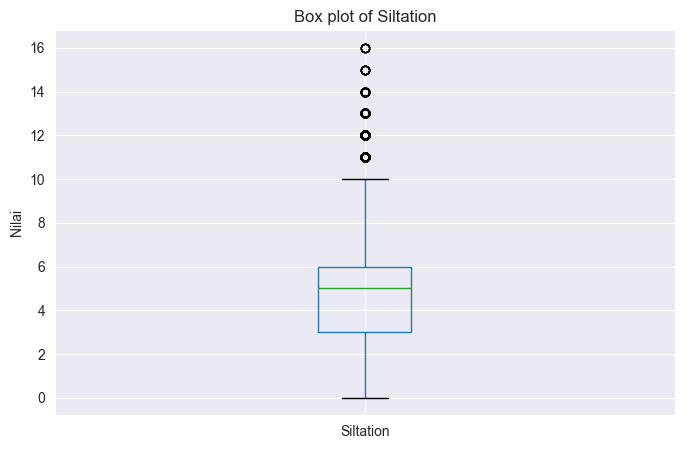

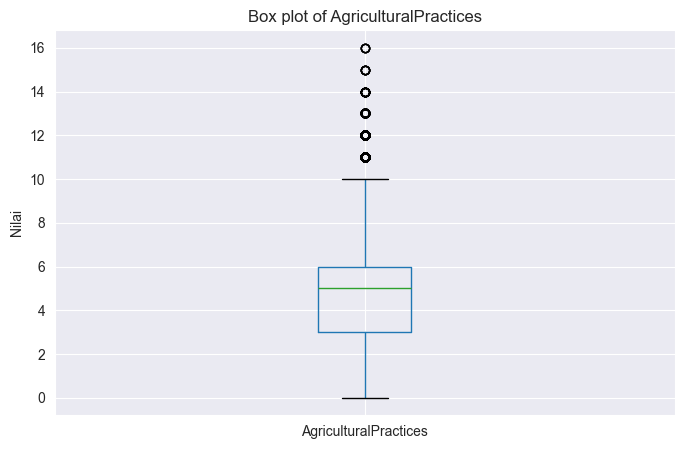

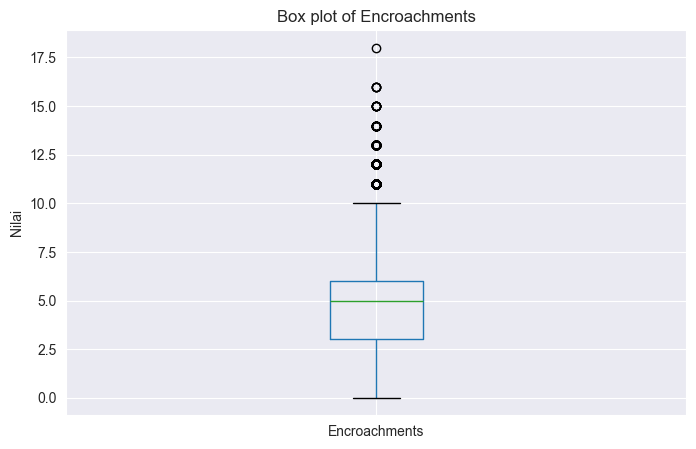

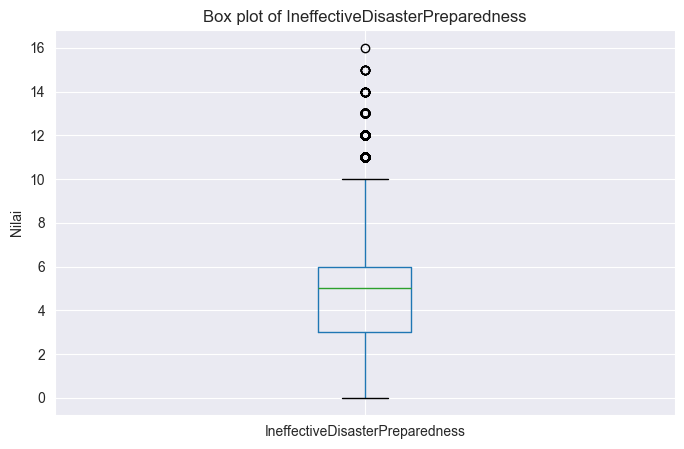

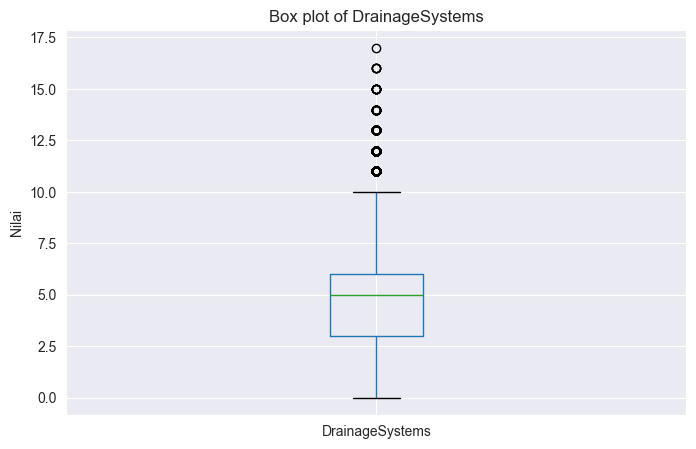

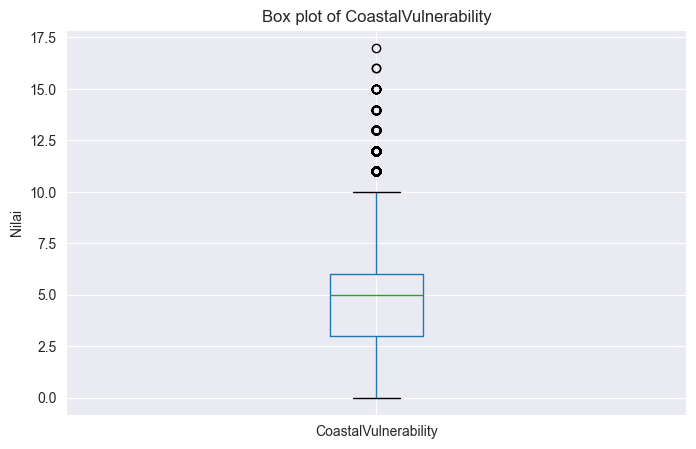

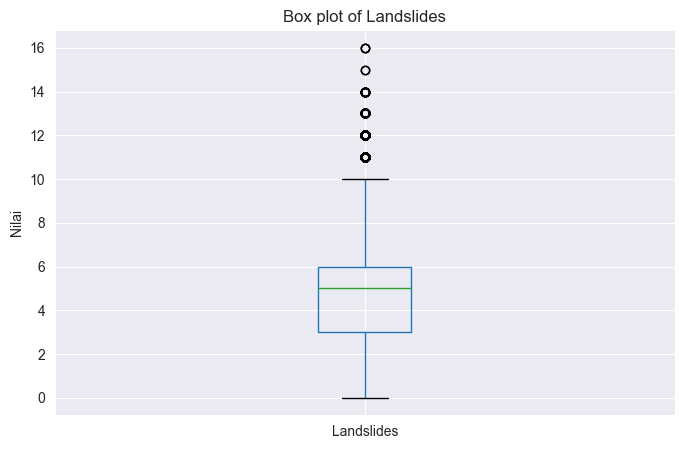

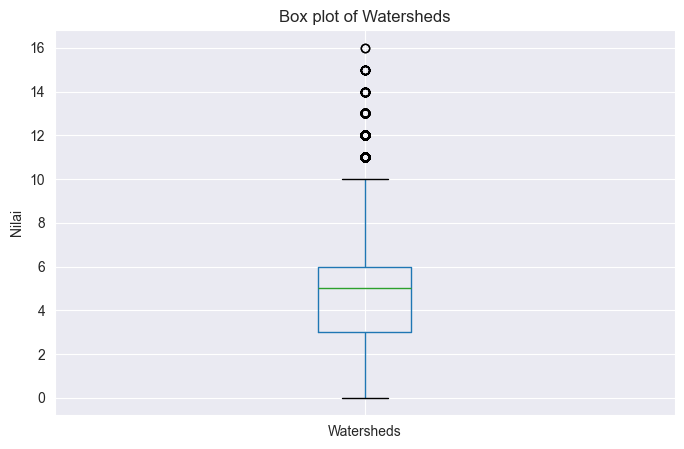

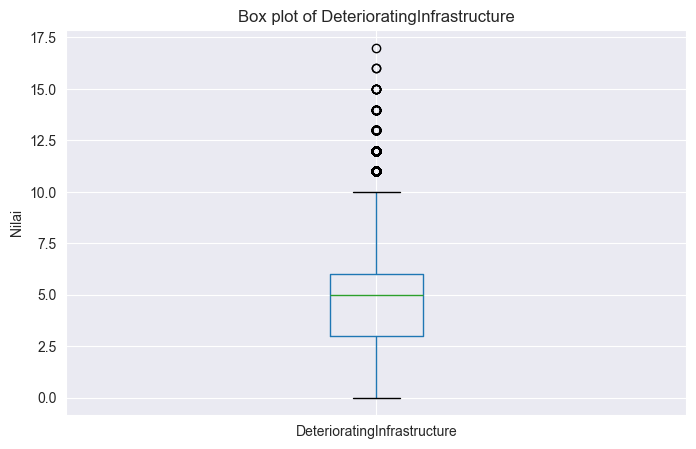

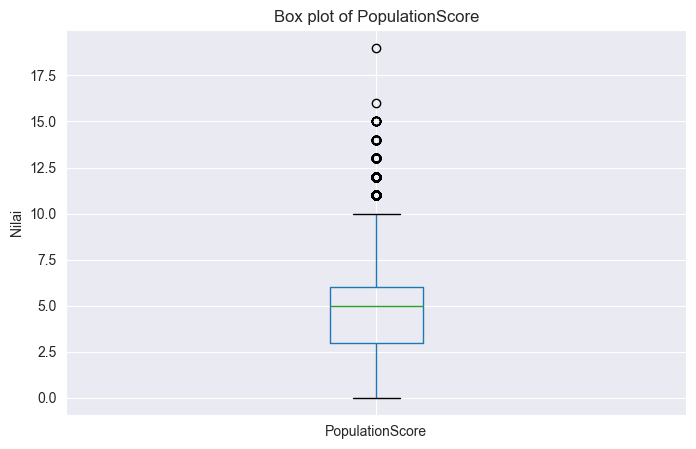

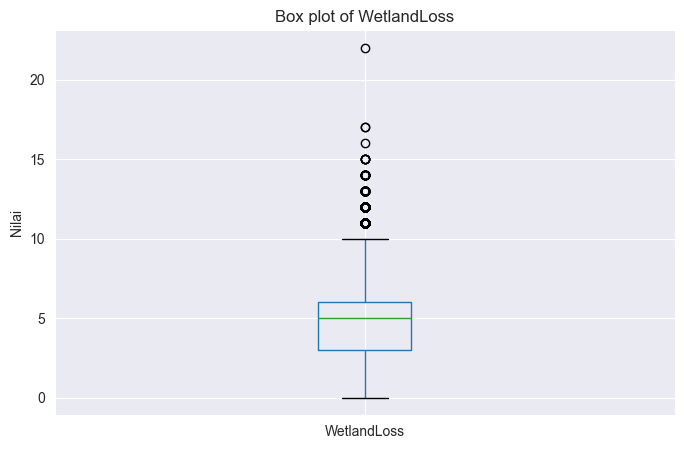

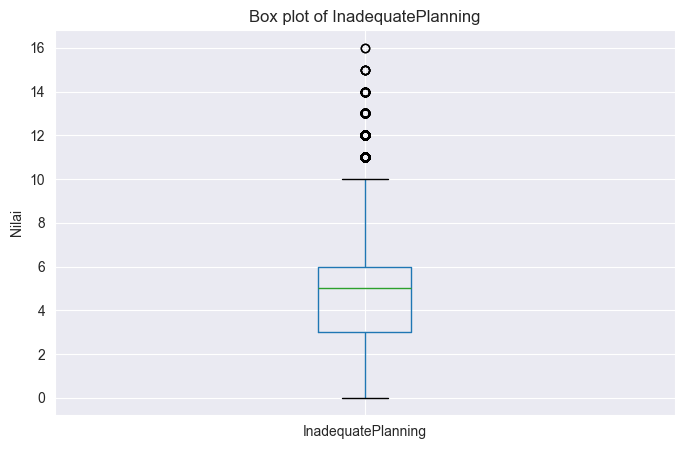

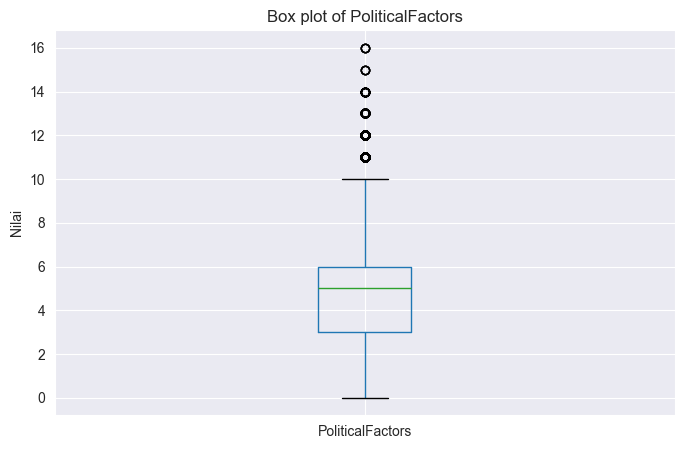

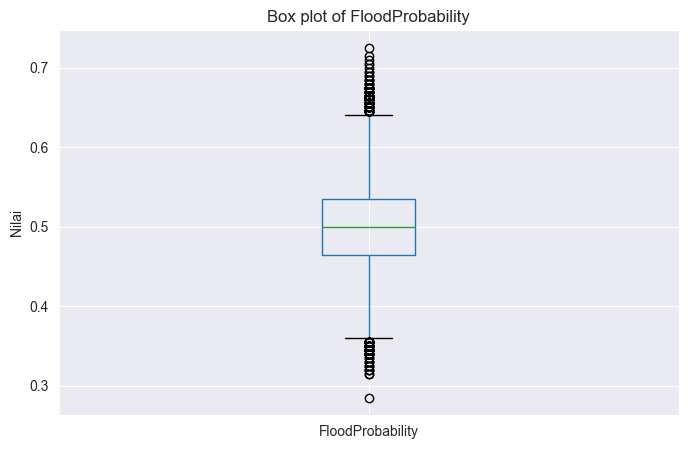

In [6]:
for col in data.columns:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=col)
    plt.title(f"Box plot of {col}")
    plt.ylabel("Nilai")
    plt.show()

Dari visualisasi tersebut menunjukkan bahwa terdapat outliers di setiap fitur

#### Mengecek nilai residual dan normalitas menggunakan Regresi Linear

In [7]:
lr = LinearRegression()

In [8]:
X = data.drop(columns='FloodProbability')
y = data['FloodProbability']

In [9]:
model = lr.fit(X, y)
y_pred = model.predict(X)

In [10]:
# Menghitung residual
residuals = y - y_pred

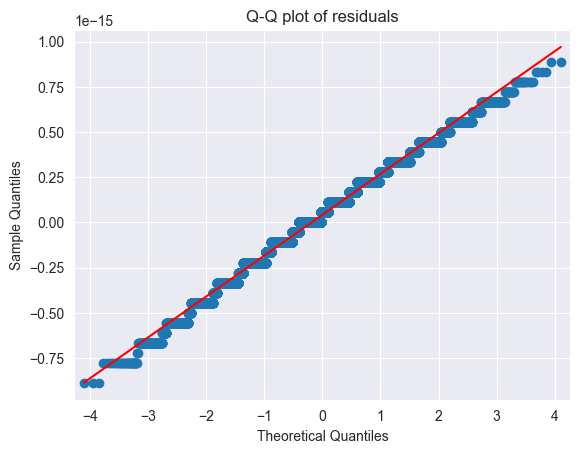

In [11]:
# Q-Q plot (mengecek normalitas)
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of residuals")
plt.show()

Jika titik-titik pada Q-Q Plot berada di sepanjang atau dekat dengan garis lurus, ini menunjukkan bahwa residual berdistribusi mendekati normal. Semakin dekat titik-titik ini ke garis, semakin baik distribusi residual mengikuti distribusi normal

In [12]:
# Uji Shapiro-wilk
shapiro = shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro.statistic}, p-value: {shapiro.pvalue}")

Shapiro-Wilk test statistic: 0.9896700053707937, p-value: 2.3235344625011897e-48


In [13]:
# Uji Kolmogorov-Smirnov
ks_test = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f"Kolmogorov-Smirnov test statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

Kolmogorov-Smirnov test statistic: 0.08324811256054798, p-value: 6.856732290250235e-302


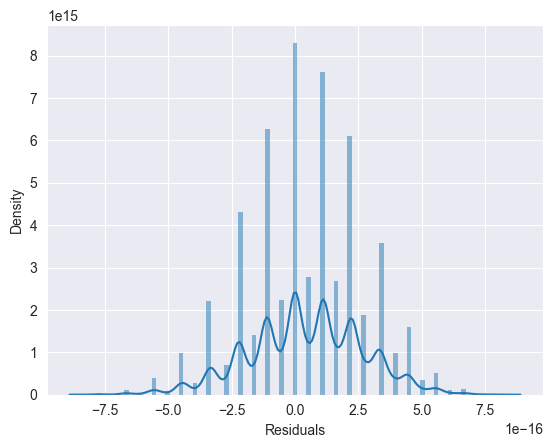

In [14]:
# Historgam
sns.histplot(residuals, kde=True, stat='density', linewidth=0)
plt.xlabel("Residuals")
plt.ylabel("Density")   
plt.show()

Jika Q-Q plot menunjukkan titik-titik mendekati garis lurus, dan uji statistik (Shapiro-Wilk dan Kolmogorov-Smirnov) menghasilkan p-value leih besar dari 0,05 maka residual dapat dianggap berdistribusi normal. Jika menunjukkan sebaliknya maka residual tidak berdistribusi normal. 

Dari dataset ini menjawab persyaratan no. 3 menunjukkan p valuenya melebihi 0,05 yang dimana menunjukkan bahwa nilai residualnya berdistribusi normal

### Mengecek apakah terdapat hubungan yang linear dengan variabel terikat

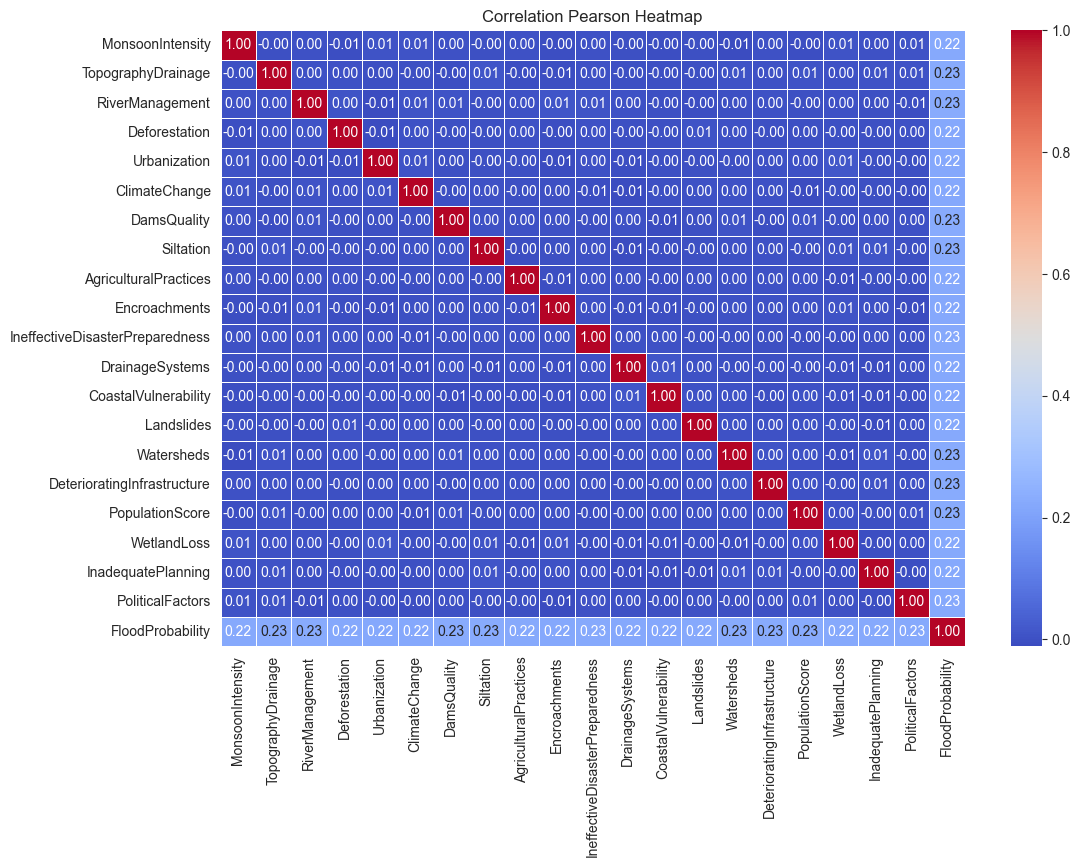

In [15]:
data_cor = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(data_cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Pearson Heatmap")
plt.show()

Dari hasil analisis tersebut menunjukkan bahwa terdapat ada hubungan yang linear dari variabel independen dengan variabel dependen (target) tapi tidak memiliki hubungan yang tidak terlalu kuat

### Cek apakah ada gejala heterokedastisitas menggunakan uji Breusch-Pagan dan melihat plot residual vs fitted values

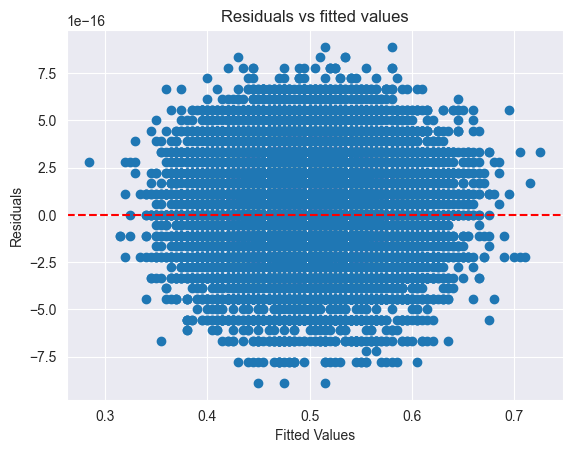

In [16]:
plt.scatter(y_pred, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted values")
plt.axhline(0, linestyle='--', color='red')
plt.show()

In [17]:
bp_test = het_breuschpagan(residuals, sm.add_constant(X))
print(f"Breusch-Pagan test p-value: {bp_test[1]}")

Breusch-Pagan test p-value: 0.7734149302288557


Jika plot residual vs fitted values tidak menunjukkan pola tertentu (tersebar secara acak) dan p-value uji Breusch-Pagan > 0.05, maka tidak ada indikasi heteroskedastisitas. Maka dari hasil analisis data yang di dapati menunjukkan bahwa tidak ada gejala heteroskedastisitas

### Cara cek apakah ada autokorelasi dengan menggunakan uji Durbin-Watson


In [18]:
dw_stats = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stats:.7f}")

Durbin-Watson statistic: 0.0000396


 Nilai Durbin-Watson yang mendekati 2 menunjukkan tidak adanya autokorelasi. Nilai jauh di bawah 2 menunjukkan autokorelasi positif, sedangkan nilai di atas 2 menunjukkan autokorelasi negatif. Maka dari hasil analisis yang di dapati menunjukkan terdapat autokorelasi positif

### Cek uji validasi dengan menggunaka k-fold cross-validation 

In [19]:
cv = cross_val_score(lr, X, y, cv=5)
print(f"Cross-validation scores: {cv}")
print(f"Mean CV score: {np.mean(cv)}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0


Hasil cross-validation yang konsisten menunjukkan bahwa model memiliki performa yang stabil pada berbagai subset data. Dari hasil analisis yang di dapati memiliki performa model yang stabil sehingga cross-validationnya konsisten

### Cek Reliabilitas menggunakan dengan Cronbach's Alpha

In [20]:
def cronbach_alpha(data):
    itemscores = data.values
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return nitems / (nitems - 1) * (1 - itemvars.sum() / tscores.var(ddof=1))

alpha = cronbach_alpha(data)
print(f"Cronbach's Alpha: {alpha}")

Cronbach's Alpha: 0.012358015941131556


Nilai Cronbach's Alpha yang mendekati 1 menunjukkan reliabilitas yang tinggi. Sedangkan reliabilitas dari dataset ini rendah

**Catatan :** 
Validasi dan reliabilitas lebih sering digunakan dalam konteks evaluasi model secara keseluruhan dan data survei. Sedangkan dataset ini bukan data survei

### Membuat model prediksi menggunakan LinearRegression dan metrik evaluasi menggunakan R2 Score

In [21]:
lin_mod = LinearRegression()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
lin_mod.fit(X_train, y_train)

y_pred = lin_mod.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R2 Score for Linear Regression: {r2:.4f}")

R2 Score for Linear Regression: 1.0000


#### Memastikan apakah overfit atau tidak

In [27]:
civi = cross_val_score(lin_mod, X, y, cv=5)
print(f"Cross validation scores in mean: {np.mean(civi)}")
print(f"Cross validation scores: {', '.join(f'{score:.5f}' for score in civi)}")

Cross validation scores in mean: 1.0
Cross validation scores: 1.00000, 1.00000, 1.00000, 1.00000, 1.00000


In [29]:
# Mencoba menggunakan metrik lain yaitu MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

MSE: 0.0000


#### Dari hasil evaluasi R2, cross validation, dan MSE bisa disebutkan bahwa model dari dataset ini tidak overfit